
Report for Normal gear, Level 150, newbie profile:
Reverse CDF = 0.1: Main Stat >= 14.7
Reverse CDF = 0.02: Main Stat >= 34.3
Reverse CDF = 0.001: Main Stat >= 49.1


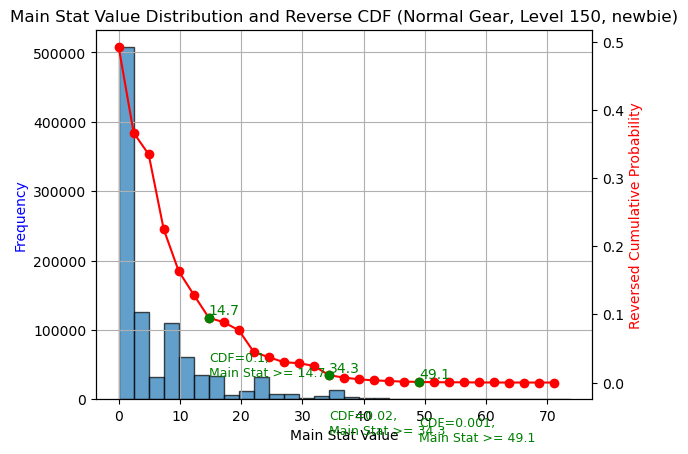


Report for Normal gear, Level 150, veteran profile:
Reverse CDF = 0.1: Main Stat >= 14.4
Reverse CDF = 0.02: Main Stat >= 24.6
Reverse CDF = 0.001: Main Stat >= 39.0


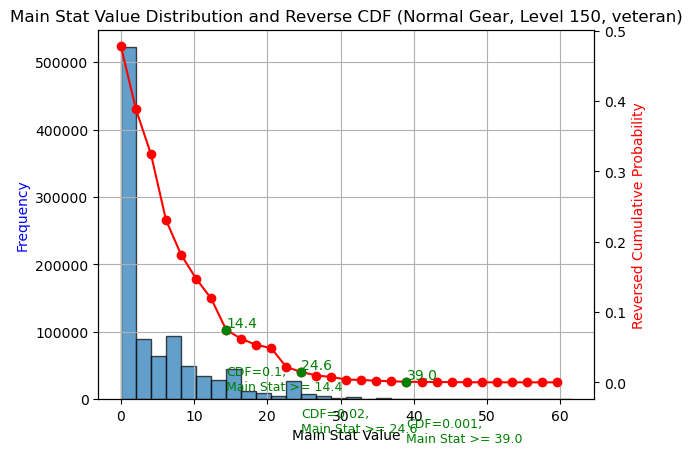


Report for Normal gear, Level 160, newbie profile:
Reverse CDF = 0.1: Main Stat >= 18.6
Reverse CDF = 0.02: Main Stat >= 34.4
Reverse CDF = 0.001: Main Stat >= 53.0


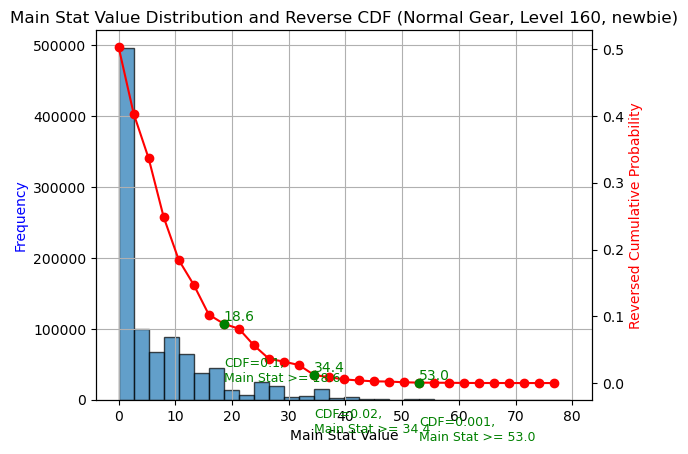


Report for Normal gear, Level 160, veteran profile:
Reverse CDF = 0.1: Main Stat >= 16.6
Reverse CDF = 0.02: Main Stat >= 26.0
Reverse CDF = 0.001: Main Stat >= 42.6


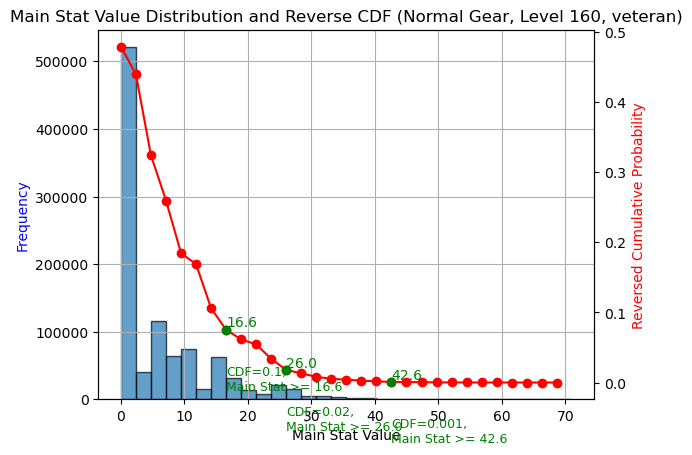


Report for Boss gear, Level 150, newbie profile:
Reverse CDF = 0.1: Main Stat >= 28.4
Reverse CDF = 0.02: Main Stat >= 42.6
Reverse CDF = 0.001: Main Stat >= 59.6


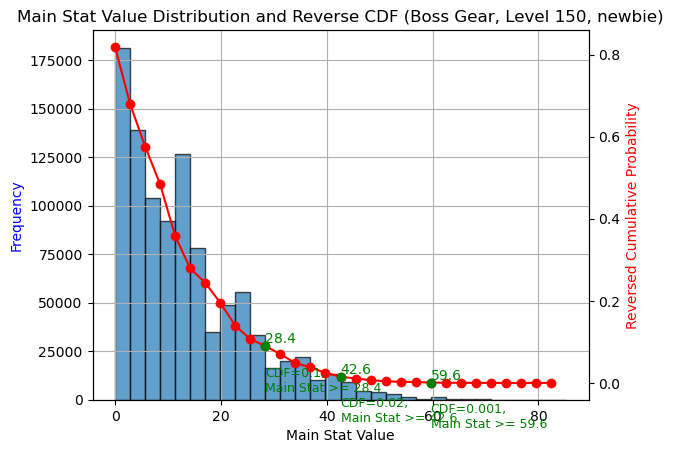


Report for Boss gear, Level 150, veteran profile:
Reverse CDF = 0.1: Main Stat >= 23.1
Reverse CDF = 0.02: Main Stat >= 34.6
Reverse CDF = 0.001: Main Stat >= 48.4


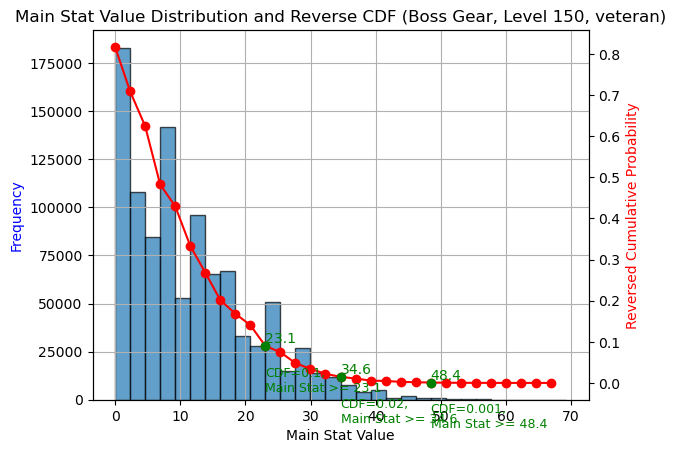


Report for Boss gear, Level 160, newbie profile:
Reverse CDF = 0.1: Main Stat >= 31.5
Reverse CDF = 0.02: Main Stat >= 44.1
Reverse CDF = 0.001: Main Stat >= 63.0


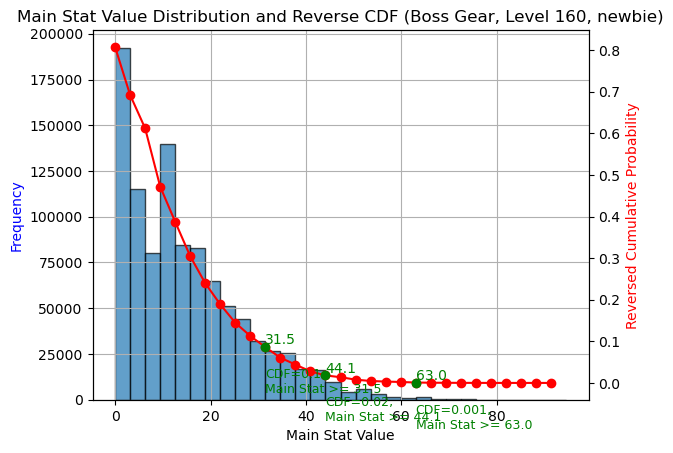


Report for Boss gear, Level 160, veteran profile:
Reverse CDF = 0.1: Main Stat >= 27.0
Reverse CDF = 0.02: Main Stat >= 37.8
Reverse CDF = 0.001: Main Stat >= 54.0


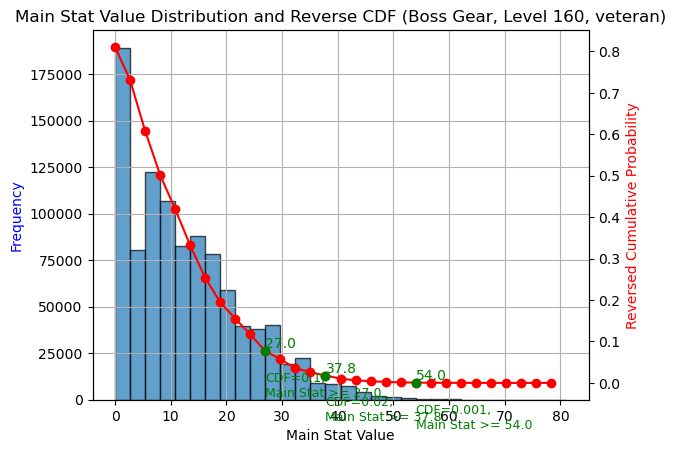


Report for Boss gear, Level 200, newbie profile:
Reverse CDF = 0.1: Main Stat >= 35.6
Reverse CDF = 0.02: Main Stat >= 49.8
Reverse CDF = 0.001: Main Stat >= 71.2


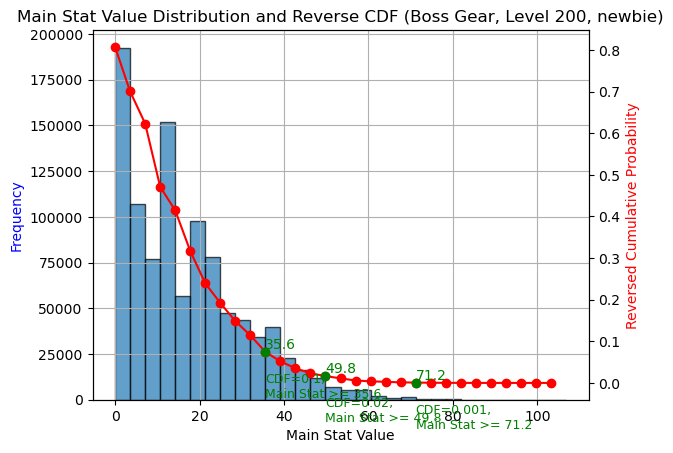


Report for Boss gear, Level 200, veteran profile:
Reverse CDF = 0.1: Main Stat >= 31.0
Reverse CDF = 0.02: Main Stat >= 43.4
Reverse CDF = 0.001: Main Stat >= 62.0


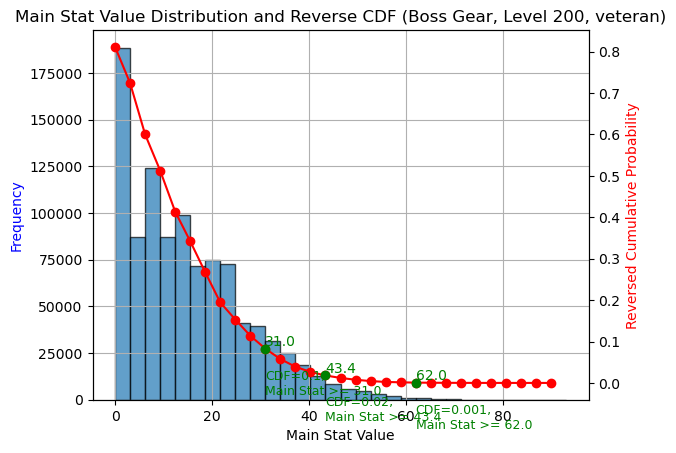


Report for Boss gear, Level 250, newbie profile:
Reverse CDF = 0.1: Main Stat >= 36.4
Reverse CDF = 0.02: Main Stat >= 54.5
Reverse CDF = 0.001: Main Stat >= 76.4


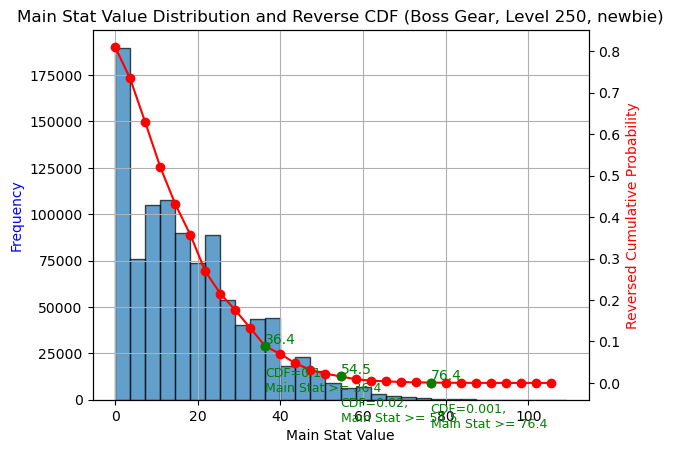


Report for Boss gear, Level 250, veteran profile:
Reverse CDF = 0.1: Main Stat >= 35.6
Reverse CDF = 0.02: Main Stat >= 48.5
Reverse CDF = 0.001: Main Stat >= 68.0


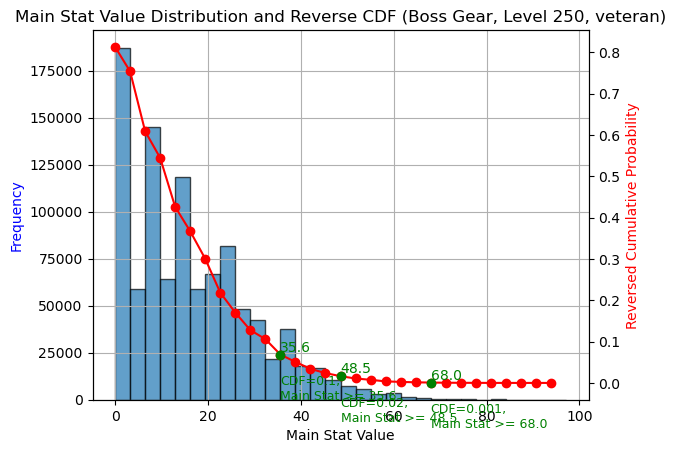

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Define attribute equivalencies for different player profiles
attribute_equivalencies = {
    'newbie': {
        'STR': 0, 'DEX': 0, 'INT': 1, 'LUK': 0.1, 'STR+DEX': 0,
        'STR+INT': 1, 'STR+LUK': 0.1, 'DEX+INT': 1, 'DEX+LUK': 0.1,
        'INT+LUK': 1+0.1, '最大HP': 0, '最大MP': 0, '穿戴等級減少': 0,
        '防禦力': 0, '攻擊力': 0, '魔力': 3, '移動速度': 0, '跳躍力': 0,
        '全屬性%': 12
    },
    'veteran': {
        'STR': 0, 'DEX': 0, 'INT': 1, 'LUK': 0.1, 'STR+DEX': 0,
        'STR+INT': 1, 'STR+LUK': 0.1, 'DEX+INT': 1, 'DEX+LUK': 0.1,
        'INT+LUK': 1+0.1, '最大HP': 0, '最大MP': 0, '穿戴等級減少': 0,
        '防禦力': 0, '攻擊力': 0, '魔力': 2, '移動速度': 0, '跳躍力': 0,
        '全屬性%': 8
    },
    # You can add more profiles here, e.g., 'intermediate', etc.
}

# Define gear level specific T1 values (T2 is 2x T1, T3 is 3x T1)
gear_tiers = {
    150: {  # 150-level gear
        'single_attr': 8,  # T1 value for single attribute
        'double_attr': 4,  # T1 value for double attribute
        'magic': 1,  # T1 value for magic
        'all_stat': 1  # T1 value for all_stat
    },
    160: {  # 160-level gear
        'single_attr': 9,  # T1 value for single attribute
        'double_attr': 5,  # T1 value for double attribute
        'magic': 1,  # T1 value for magic
        'all_stat': 1  # T1 value for all_stat
    },
    200: {  # 200-level gear
        'single_attr': 11,  # T1 value for single attribute
        'double_attr': 6,  # T1 value for double attribute
        'magic': 1,  # T1 value for magic
        'all_stat': 1  # T1 value for all_stat
    },
    250: {  # 250-level gear
        'single_attr': 12,  # T1 value for single attribute
        'double_attr': 7,  # T1 value for double attribute
        'magic': 1,  # T1 value for magic
        'all_stat': 1  # T1 value for all_stat
    },
    # You can add more gear levels here
}

# Probability of each tier
tier_probabilities = [0.5, 0.3, 0.2]  # T1: 50%, T2: 30%, T3: 20%

# List of attribute types
attribute_types = list(attribute_equivalencies['newbie'].keys())


# Function to get tiered values based on gear level
def get_tiered_value(tier, base_value):
    if tier == 'T1':
        return base_value
    elif tier == 'T2':
        return base_value * 2
    elif tier == 'T3':
        return base_value * 3


# Function to simulate the number of selected attributes based on gear type
def select_number_of_attributes(gear_type):
    if gear_type == 'Boss':
        return 4  # Always select 4 attributes for Boss gear
    elif gear_type == 'Normal':
        return random.choices([1, 2, 3, 4], [0.4, 0.4, 0.15, 0.05])[0]  # 40%, 40%, 15%, 5%


# Function to simulate a single enhancement for either Boss or Normal gear and different gear levels
def simulate_enhancement(gear_type='Boss', gear_level=200, equivalency_profile='newbie'):
    # Load attribute equivalency based on the selected profile
    selected_equivalency = attribute_equivalencies[equivalency_profile]
    gear_values = gear_tiers[gear_level]  # Get the T1 values for the selected gear level
    num_attributes = select_number_of_attributes(gear_type)
    selected_attributes = random.sample(attribute_types, num_attributes)  # Randomly select the attributes
    total_main_stat = 0

    for attr in selected_attributes:
        # Determine the tier (T1, T2, T3)
        tier = random.choices(['T1', 'T2', 'T3'], tier_probabilities)[0]

        # Get the corresponding stat increase based on attribute type and tier
        if '+' in attr:  # Double attributes (e.g., STR+INT)
            base_value = gear_values['double_attr']
        elif attr == '魔力':
            base_value = gear_values['magic']
        elif attr == '全屬性%':
            base_value = gear_values['all_stat']
        else:
            base_value = gear_values['single_attr']

        increase = get_tiered_value(tier, base_value)
        # Calculate the main stat contribution based on the attribute type
        total_main_stat += increase * selected_equivalency[attr]

    return total_main_stat


# Simulate enhancements
def run_simulation(gear_type='Boss', gear_level=200, equivalency_profile='newbie', num_simulations=5000):
    results = [simulate_enhancement(gear_type, gear_level, equivalency_profile) for _ in range(num_simulations)]

    # Recalculate the histogram and reverse CDF
    n, bins = np.histogram(results, bins=30)
    cdf = np.cumsum(n) / np.sum(n)
    reverse_cdf = 1 - cdf

    # Identify the main stat values corresponding to the reversed CDF values of 0.1, 0.02, and 0.001
    thresholds = [0.1, 0.02, 0.001]
    markers = []
    for threshold in thresholds:
        idx = np.argmax(reverse_cdf <= threshold)
        markers.append((bins[idx], reverse_cdf[idx]))

    # Print report for Reverse CDF = 0.1, 0.02, 0.001
    print(f"\nReport for {gear_type} gear, Level {gear_level}, {equivalency_profile} profile:")
    for i, (main_stat_value, marker_cdf) in enumerate(markers):
        print(f"Reverse CDF = {thresholds[i]}: Main Stat >= {main_stat_value:.1f}")

    # Plot both the histogram and the reversed cumulative distribution function (CDF)
    fig, ax1 = plt.subplots()

    # Plot the histogram on the first axis
    n, bins, patches = ax1.hist(results, bins=30, edgecolor='black', alpha=0.7)
    ax1.set_xlabel('Main Stat Value')
    ax1.set_ylabel('Frequency', color='b')
    ax1.set_title(
        f'Main Stat Value Distribution and Reverse CDF ({gear_type} Gear, Level {gear_level}, {equivalency_profile})')
    ax1.grid(True)

    # Create a second y-axis to plot the reversed cumulative distribution function
    ax2 = ax1.twinx()
    ax2.plot(bins[:-1], reverse_cdf, 'r-', marker='o')
    ax2.set_ylabel('Reversed Cumulative Probability', color='r')

    # Mark the points on the reverse CDF for 0.1, 0.02, 0.001
    for i, (marker_value, marker_cdf) in enumerate(markers):
        ax2.plot(marker_value, marker_cdf, 'go')  # Mark with green circles
        ax2.text(marker_value, marker_cdf, f'{marker_value:.1f}', color='green', fontsize=10,
                 verticalalignment='bottom')
        explanation = f'CDF={thresholds[i]},\nMain Stat >= {marker_value:.1f}'
        ax2.text(marker_value, marker_cdf - 0.05, explanation, color='green', fontsize=9, verticalalignment='top')

    plt.show()


# Example usage
run_simulation(gear_type='Normal', gear_level=150, equivalency_profile='newbie', num_simulations=1000000)
run_simulation(gear_type='Normal', gear_level=150, equivalency_profile='veteran', num_simulations=1000000)

run_simulation(gear_type='Normal', gear_level=160, equivalency_profile='newbie', num_simulations=1000000)
run_simulation(gear_type='Normal', gear_level=160, equivalency_profile='veteran', num_simulations=1000000)

run_simulation(gear_type='Boss', gear_level=150, equivalency_profile='newbie', num_simulations=1000000)
run_simulation(gear_type='Boss', gear_level=150, equivalency_profile='veteran', num_simulations=1000000)

run_simulation(gear_type='Boss', gear_level=160, equivalency_profile='newbie', num_simulations=1000000)
run_simulation(gear_type='Boss', gear_level=160, equivalency_profile='veteran', num_simulations=1000000)

run_simulation(gear_type='Boss', gear_level=200, equivalency_profile='newbie', num_simulations=1000000)
run_simulation(gear_type='Boss', gear_level=200, equivalency_profile='veteran', num_simulations=1000000)

run_simulation(gear_type='Boss', gear_level=250, equivalency_profile='newbie', num_simulations=1000000)
run_simulation(gear_type='Boss', gear_level=250, equivalency_profile='veteran', num_simulations=1000000)

